In [1]:
import time
import random
from math import *
import operator

import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier

# import libraries for model validation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"

In [3]:
# load the training data from iris.txt
df_training = pd.read_csv(location )

In [4]:
df_training.shape

(150, 5)

In [5]:
df_training.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# copy the predictor variables into X and responses in y
X = df_training[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y = df_training['class']

X - typically means MATRICES (n dimension arrays)

y - typically means response - 1 dimension array

In [7]:
# split the data into training and test data
# for class balance enter stratify=y, [stratify=n does not seem to work]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

# X_train = 500 samples (n cols). y_train = 500 (1 col)
# X_test = 100 samples (n cols). y_test = 100 (1 col)
# y_pred ??? because i have not done the prediction yet.

(112, 4)
(38, 4)
(112,)
(38,)


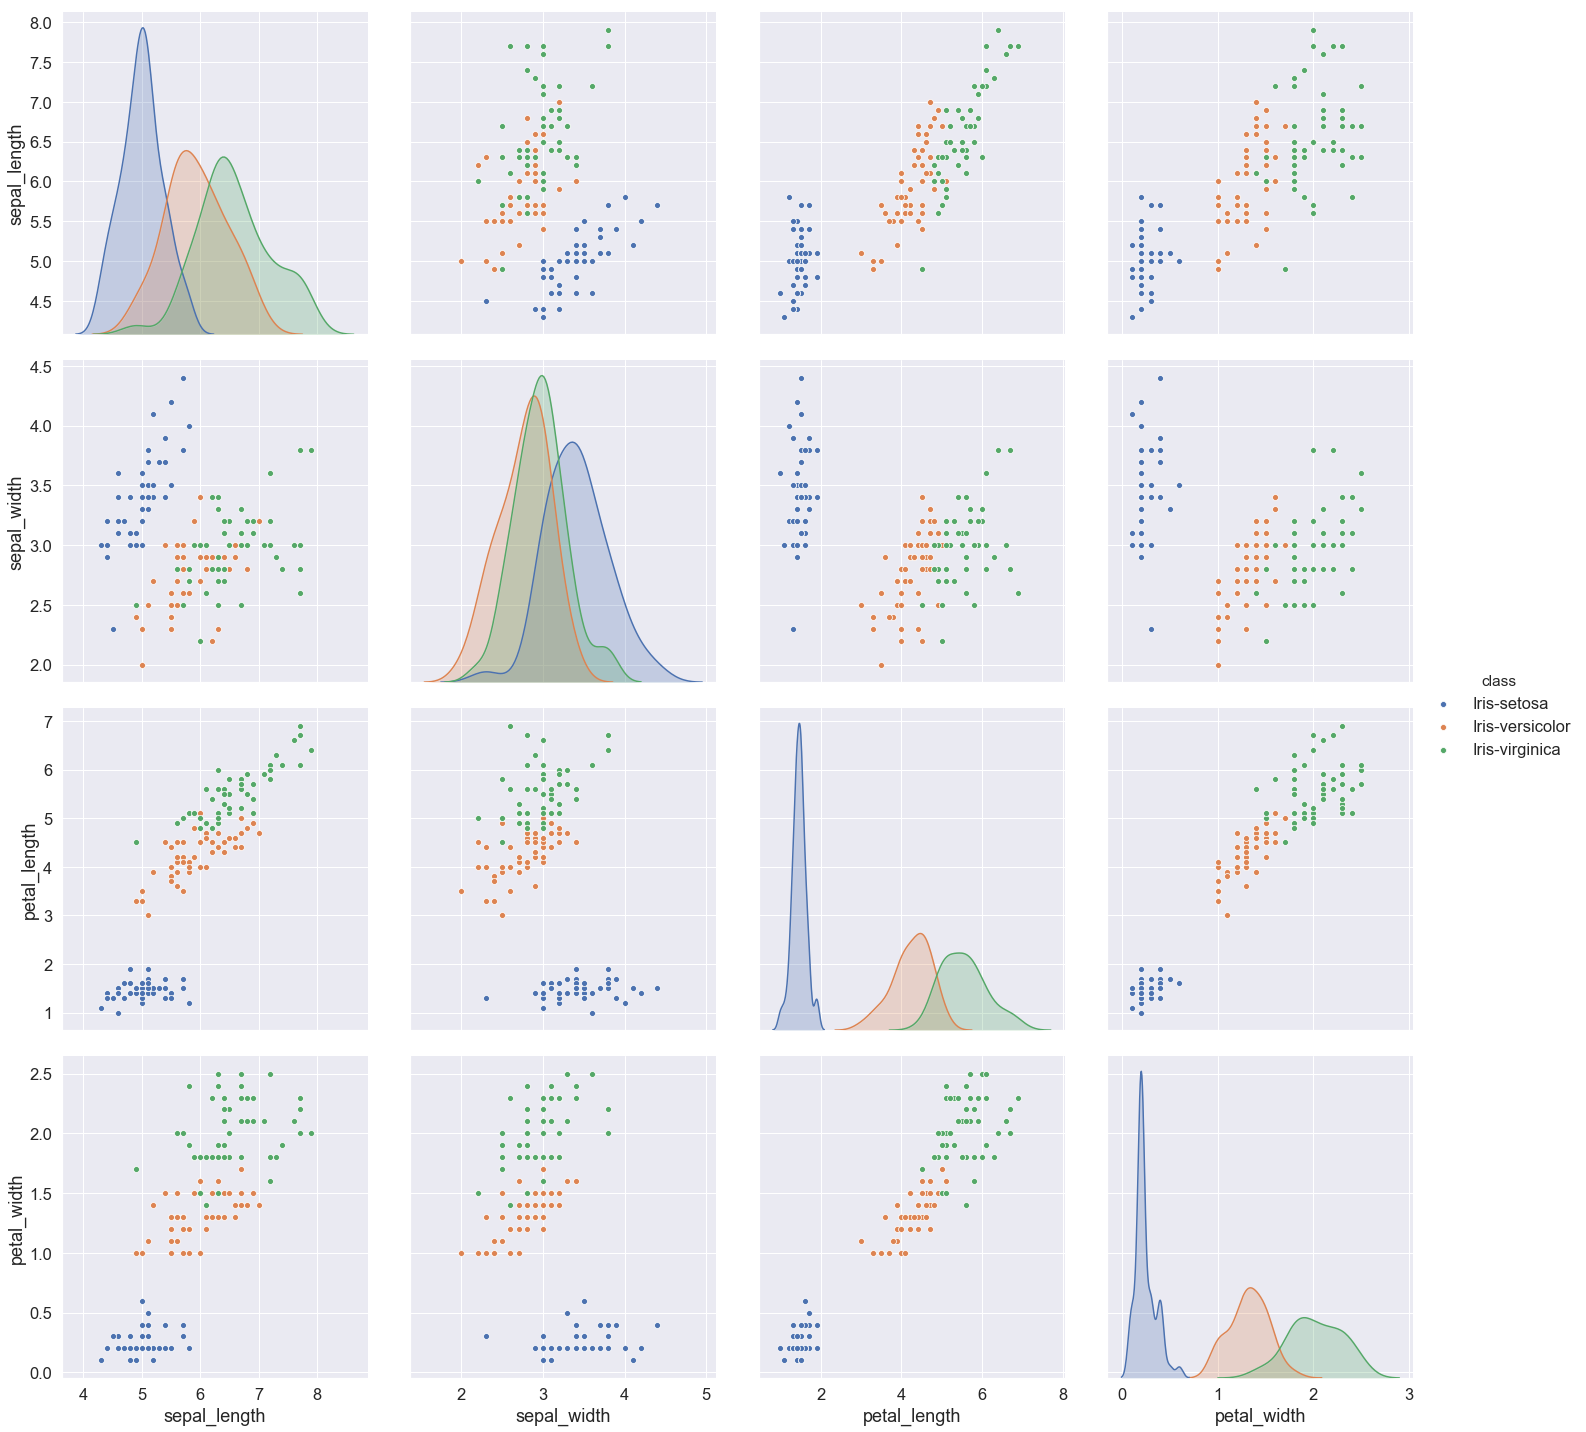

In [9]:
sns.pairplot(data=df_training, hue='class', height=5);

In [10]:
# instantiate the classifier
# knn = KNeighborsClassifier(n_neighbors=5)
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

#knn = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='minkowski', p=1)
knn = KNeighborsClassifier(n_neighbors=5)

In [11]:
# fit the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
# making predictions on the testing set
y_pred = knn.predict(X_test)

In [13]:
y_test.value_counts()

Iris-setosa        18
Iris-virginica     12
Iris-versicolor     8
Name: class, dtype: int64

In [14]:
len(y_pred)

38

In [15]:
y_pred[:10]

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [16]:
y_test[:10]

128     Iris-virginica
18         Iris-setosa
130     Iris-virginica
105     Iris-virginica
107     Iris-virginica
78     Iris-versicolor
83     Iris-versicolor
14         Iris-setosa
5          Iris-setosa
133     Iris-virginica
Name: class, dtype: object

In [17]:
# get the confusioon matrix
metrics.confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 12]], dtype=int64)

In [18]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("kNN model accuracy:", metrics.accuracy_score(y_test, y_pred))

kNN model accuracy: 0.9736842105263158


In [19]:
# making prediction for out of sample data
sample = [[3.4, 1.5, 1.2, 2]]

preds = knn.predict(sample)
preds

array(['Iris-setosa'], dtype=object)

In [20]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("kNN model accuracy:\n", metrics.classification_report(y_test, y_pred))

kNN model accuracy:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      0.88      0.93         8
 Iris-virginica       0.92      1.00      0.96        12

      micro avg       0.97      0.97      0.97        38
      macro avg       0.97      0.96      0.96        38
   weighted avg       0.98      0.97      0.97        38



In [21]:
metrics.f1_score(y_test, y_pred, average='weighted')

0.9733333333333335

In [22]:
# predict probabilities
knn.predict_proba(X_test)

array([[0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.4, 0.6],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.6, 0.4],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0.8, 0.2],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ]])

#### Finding which neighbors

__kneighbors__([X, n_neighbors, return_distance])	
Finds the K-neighbors of a point.

__kneighbors_graph__([X, n_neighbors, mode])	
Computes the (weighted) graph of k-Neighbors for points in X

Finds the K-neighbors of a point. 

Returns 
- distances to the neighbors of each point.
- indices of the neighbors in the training set

In [23]:
# find which neighbors
knn.kneighbors(X_test)

(array([[0.1       , 0.31622777, 0.33166248, 0.37416574, 0.38729833],
        [0.38729833, 0.46904158, 0.54772256, 0.54772256, 0.54772256],
        [0.45825757, 0.50990195, 0.53851648, 0.678233  , 0.84852814],
        [0.26457513, 0.54772256, 0.54772256, 0.81853528, 0.86023253],
        [0.54772256, 0.55677644, 0.60827625, 0.678233  , 0.8660254 ],
        [0.2       , 0.33166248, 0.34641016, 0.37416574, 0.38729833],
        [0.36055513, 0.37416574, 0.42426407, 0.42426407, 0.42426407],
        [0.41231056, 0.54772256, 0.58309519, 0.59160798, 0.65574385],
        [0.34641016, 0.36055513, 0.37416574, 0.38729833, 0.41231056],
        [0.36055513, 0.43588989, 0.45825757, 0.46904158, 0.5       ],
        [0.2       , 0.2       , 0.2236068 , 0.3       , 0.36055513],
        [0.2236068 , 0.3       , 0.3       , 0.3       , 0.31622777],
        [0.17320508, 0.17320508, 0.2       , 0.24494897, 0.26457513],
        [0.14142136, 0.2236068 , 0.42426407, 0.43588989, 0.43588989],
        [0.26457513,

# Use 2D plot to show the scatter and indicate the k-neighbors

In [24]:
# load the training data from iris.txt
df_training = pd.read_csv(location )

In [25]:
# convert string class names to number , 0, 1, 2 ...
class_nums = {"class": {"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2}}

In [26]:
df_training.replace(class_nums, inplace=True)
df_training.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
X = df_training.drop(['class', 'petal_length', 'petal_width' ], axis = 1)
y = df_training['class']

In [28]:
X.columns

Index(['sepal_length', 'sepal_width'], dtype='object')

In [29]:
# instantiate the classifier
# knn = KNeighborsClassifier(n_neighbors=5)
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
# testing samples
# sepal_length  sepal_width  class
#          6.3          2.3   2
#          6.4          2.7   1 
X_test = [[7, 1]]

In [31]:
# retrieve the neighbors list (returns the distances and indices of the neighbors)
neigh_list = knn.kneighbors(X_test)


In [32]:
neigh_list

(array([[1.44222051, 1.47648231, 1.52970585, 1.56204994, 1.56204994]]),
 array([[ 68,  87, 108,  62, 119]], dtype=int64))

In [33]:
neigh_list[0][0]

array([1.44222051, 1.47648231, 1.52970585, 1.56204994, 1.56204994])

In [34]:
test1_neighbors = neigh_list[1][0]

In [35]:
test1_neighbors

array([ 68,  87, 108,  62, 119], dtype=int64)

In [36]:
X.iloc[test1_neighbors]

,sepal_length,sepal_width
68,6.2,2.2
87,6.3,2.3
108,6.7,2.5
62,6.0,2.2
119,6.0,2.2


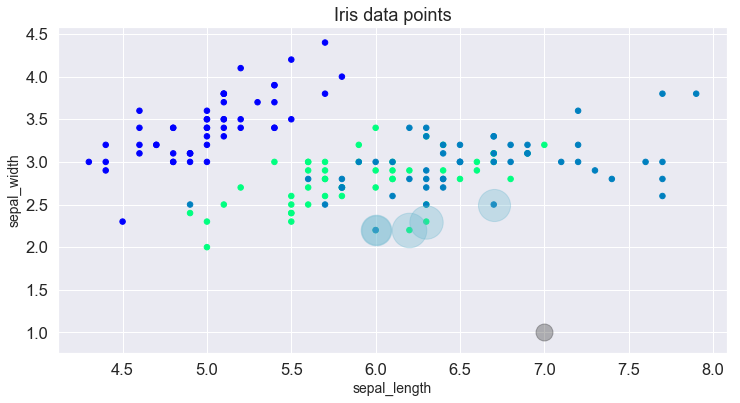

In [37]:
%matplotlib inline
plt.figure(figsize=(12, 6))

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]

# all the training points
plt.scatter(xs, ys, s=30, c=df_training['class'], marker='o', cmap='winter') 

# test point 1
plt.scatter(X_test[0][0], 
            X_test[0][1], 
            s=290, 
            c='k',
            alpha=.3)  

# # test point2
# plt.scatter(X_test.iloc[1:2, 0], 
#            X_test.iloc[1:2, 1], 
#            s=90, 
#            c='r',
#            alpha=.5)

# highlight the neighbors

size_reduction = 85
size_neigh = 1200

for ind in test1_neighbors:
    test1_x = X.iloc[ind]['sepal_length']
    test1_y = X.iloc[ind]['sepal_width']
    
    plt.scatter(test1_x, 
               test1_y, 
               s=size_neigh, 
               c='c',
               marker='o',
               alpha=.3)   
    
    size_neigh = size_neigh -size_reduction

plt.title('Iris data points')
plt.xlabel('sepal_length', fontsize=14)
plt.ylabel('sepal_width', fontsize=14);

# Use 3D plot to show the scatter and indicate the k-neighbors

In [38]:
# load the training data from iris.txt
df_training = pd.read_csv(location )

In [39]:
# convert string class names to number , 0, 1, 2 ...
class_nums = {"class": {"Iris-setosa": 0, "Iris-virginica": 1, "Iris-versicolor": 2}}

In [40]:
df_training.replace(class_nums, inplace=True)
df_training.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [41]:
X = df_training.drop(['class', 'petal_width'], axis = 1)
y = df_training['class']

In [42]:
# instantiate the classifier
# knn = KNeighborsClassifier(n_neighbors=5)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
# testing samples
# sepal_length  sepal_width  petal_length class
#          6.3          2.3       4.5        2
#          6.4          2.7       5.3        1 
X_test = [[3.6, 2.9, 5.3]]

In [44]:
# retrieve the neighbors list (returns the distances and indices of the neighbors)
neigh_list = knn.kneighbors(X_test)
neigh_list

(array([[1.57797338, 1.97230829, 2.04205779, 2.12367606, 2.13541565]]),
 array([[106,  84, 121,  90,  59]], dtype=int64))

In [45]:
# and the neighbors are 
X.iloc[[106,  84, 121,  90,  59]]

,sepal_length,sepal_width,petal_length
106,4.9,2.5,4.5
84,5.4,3.0,4.5
121,5.6,2.8,4.9
90,5.5,2.6,4.4
59,5.2,2.7,3.9


In [46]:
test1_neighbors = neigh_list[1][0]

In [47]:
for ind in test1_neighbors:
    test1_x = X.iloc[ind]['sepal_length']
    test1_y = X.iloc[ind]['sepal_width']
    test1_z = X.iloc[ind]['petal_length']
    
    print(test1_x, test1_y, test1_z)

4.9 2.5 4.5
5.4 3.0 4.5
5.6 2.8 4.9
5.5 2.6 4.4
5.2 2.7 3.9


<IPython.core.display.Javascript object>


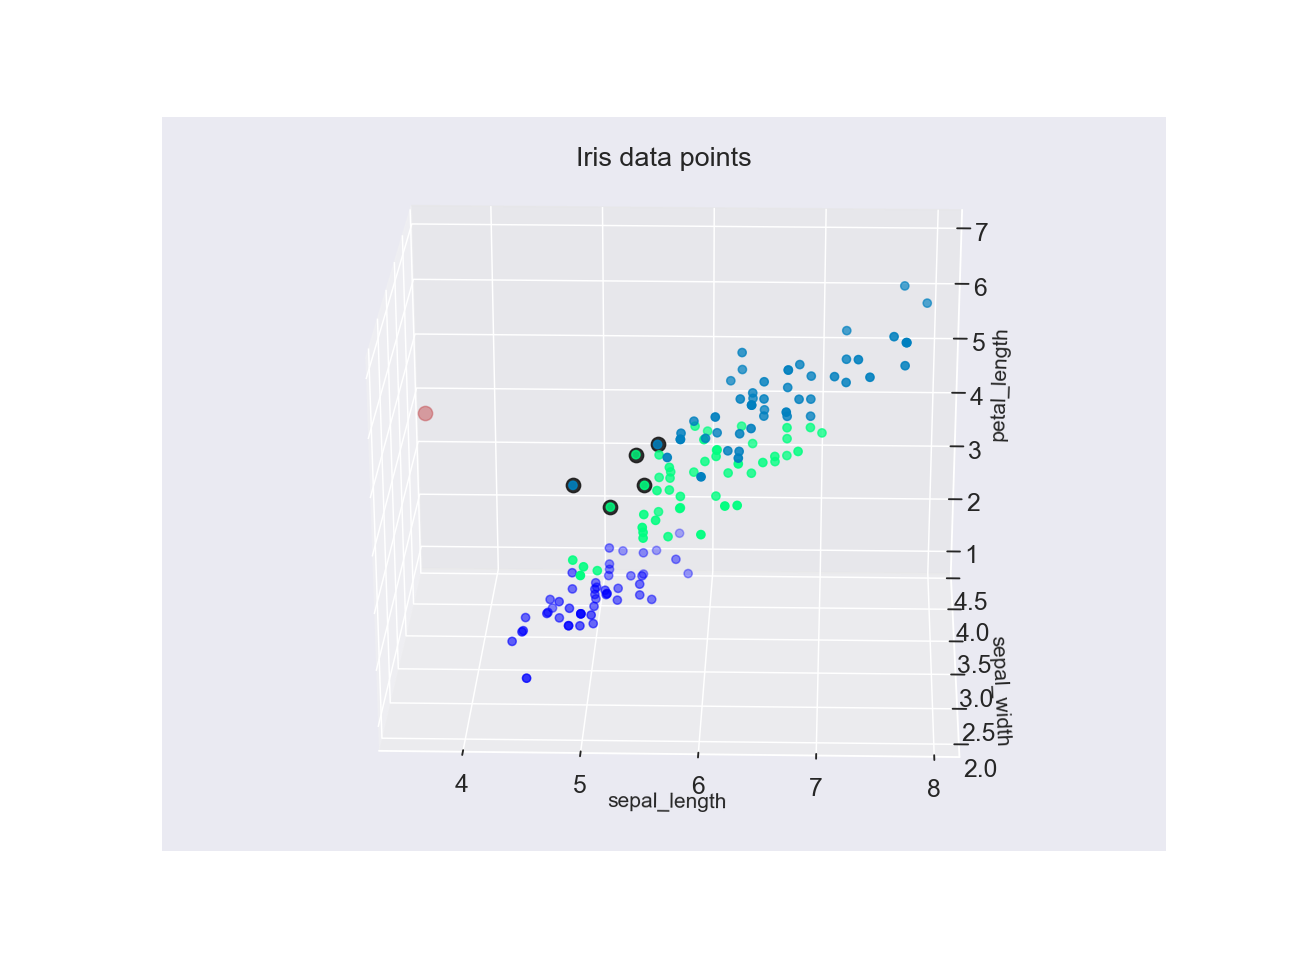

In [49]:
%matplotlib notebook
%matplotlib notebook

# plot the data points
fig = plt.figure(figsize=(12, 9))

ax = fig.add_subplot(111, projection='3d')

ticks_font = matplotlib.font_manager.FontProperties(family='times new roman', 
                                                    style='normal', 
                                                    size=12, 
                                                    weight='normal', 
                                                    stretch='normal')

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]

# all the training points
ax.scatter(xs, ys, zs, s=30, c=df_training['class'], marker='o', cmap='winter') 

# test point 1
ax.scatter(X_test[0][0], 
           X_test[0][1], 
           X_test[0][2], 
           s=90, 
           c='r',
           alpha=.5)  

# # test point2
# ax.scatter(X_test.iloc[1:2, 0], 
#            X_test.iloc[1:2, 1], 
#            X_test.iloc[1:2, 2], 
#            s=90, 
#            c='r',
#            alpha=.5)

# highlight the neighbors
point = 1
for ind in test1_neighbors:
    test1_x = X.iloc[ind]['sepal_length']
    test1_y = X.iloc[ind]['sepal_width']
    test1_z = X.iloc[ind]['petal_length']
    
    ax.scatter(test1_x, 
               test1_y, 
               test1_z, 
               s=90, 
               c='k',
               marker='o',
               alpha=.9)   
    point += 1

ax.set_title('Iris data points')
ax.set_xlabel('sepal_length', fontsize=14)
ax.set_ylabel('sepal_width', fontsize=14)
ax.set_zlabel('petal_length', fontsize=14);

# for label in ax.get_xticklabels():
#     label.set_fontproperties(ticks_font)

# for label in ax.get_yticklabels():
#     label.set_fontproperties(ticks_font)
    
# for label in ax.get_zticklabels():
#     label.set_fontproperties(ticks_font)

#ax.legend();